In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

### load data

In [2]:
df = pd.read_csv("weather_data.csv")

### get the shape of data

In [3]:
df.shape

(311, 7)

In [4]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [5]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [6]:
df.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269
310,2023-11-07,19.389714,37.717416,9.388371,No Rain,25.929676,983.134701


### Convert date column to datetime format

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

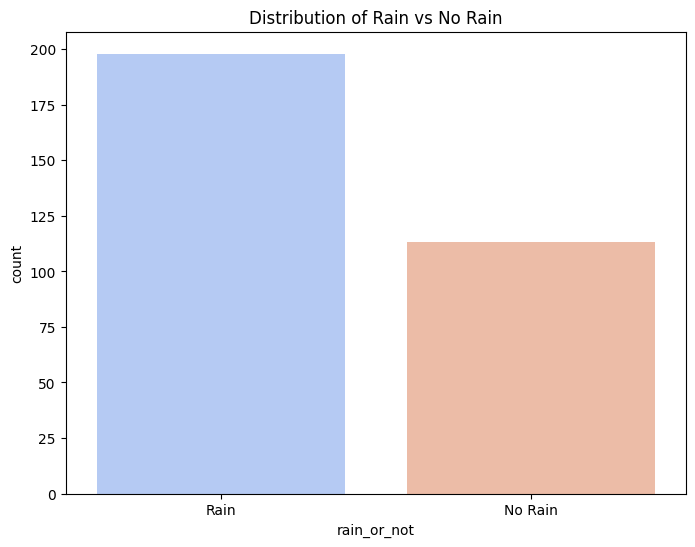

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rain_or_not', data=df, hue='rain_or_not', palette='coolwarm', legend=False)
plt.title("Distribution of Rain vs No Rain")
plt.show()

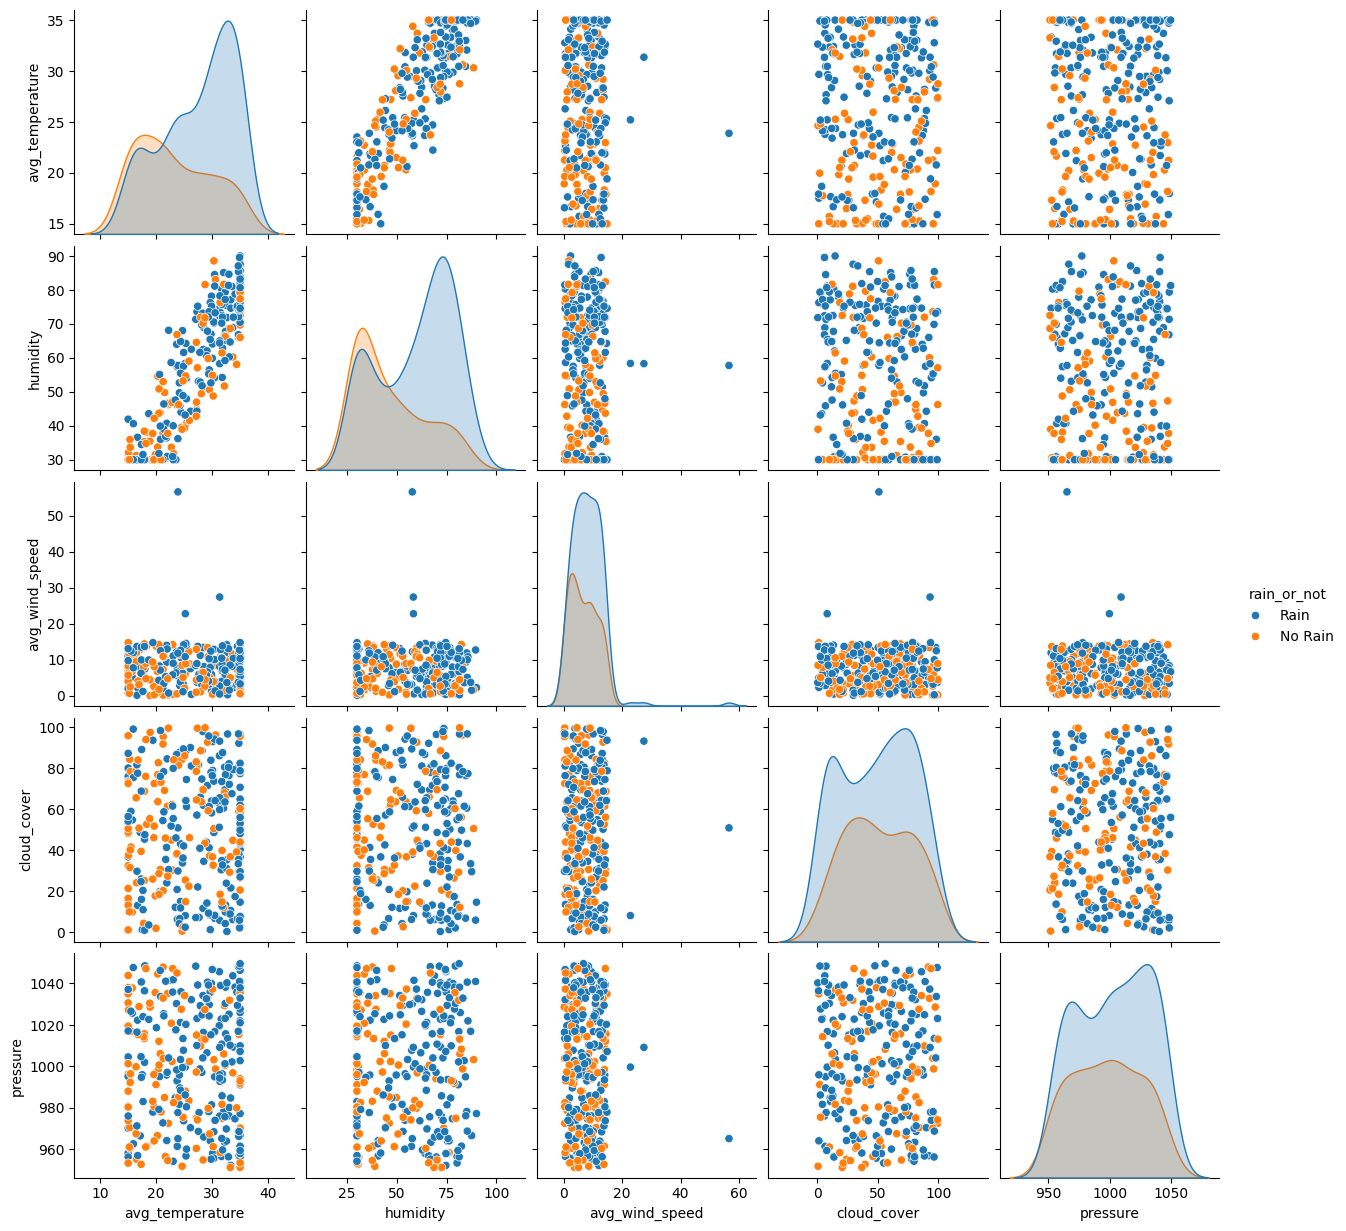

In [9]:
sns.pairplot(df, hue='rain_or_not', diag_kind='kde')
plt.show()

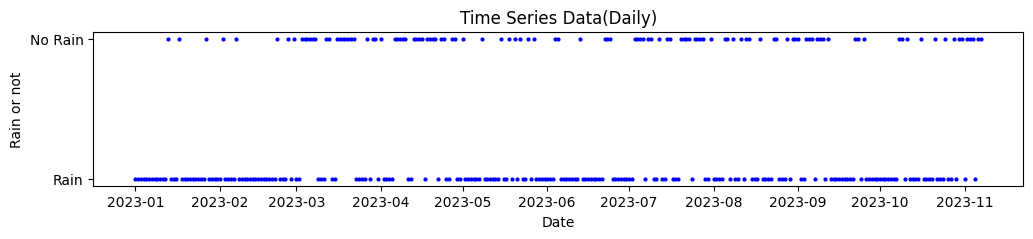

In [10]:
plt.figure(figsize=(12, 2))
plt.plot(df['date'], df['rain_or_not'],'bo', markersize=2)
plt.title('Time Series Data(Daily)')
plt.xlabel('Date')
plt.ylabel('Rain or not')
plt.show()

### Convert categorical rain_or_not values to binary (1 = Rain, 0 = Not Rain)

In [11]:
df['rain_or_not'] = df['rain_or_not'].str.strip().str.lower().map({'rain': 1, 'no rain': 0})

### Extracting time-based features

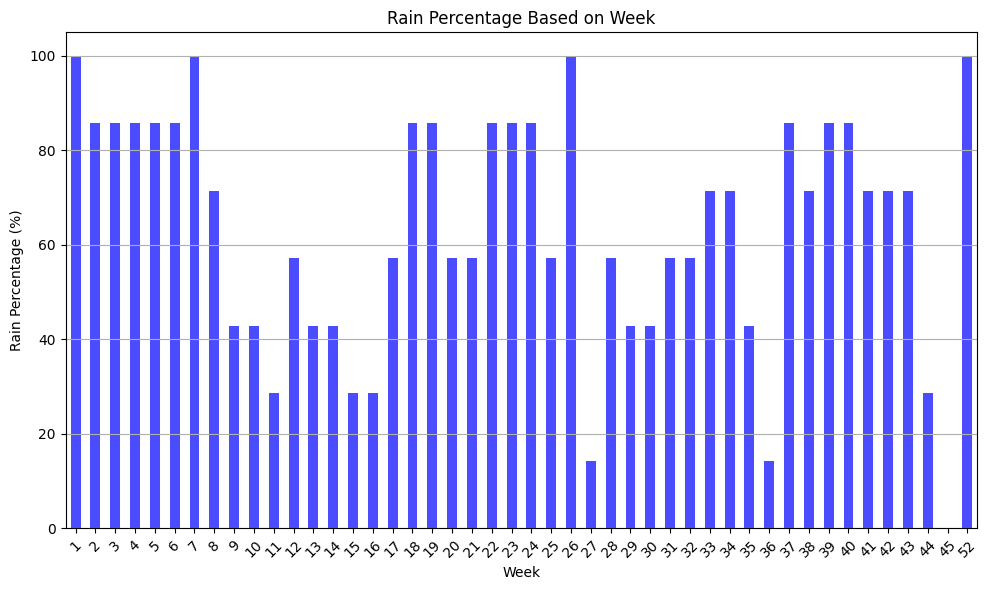

In [12]:
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week
rain_percentage_week = df.groupby('week')['rain_or_not'].mean() * 100
df['rain_%_week']=df['week'].map(rain_percentage_week)

plt.figure(figsize=(10, 6))
rain_percentage_week.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Rain Percentage Based on Week')
plt.xlabel('Week')
plt.ylabel('Rain Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

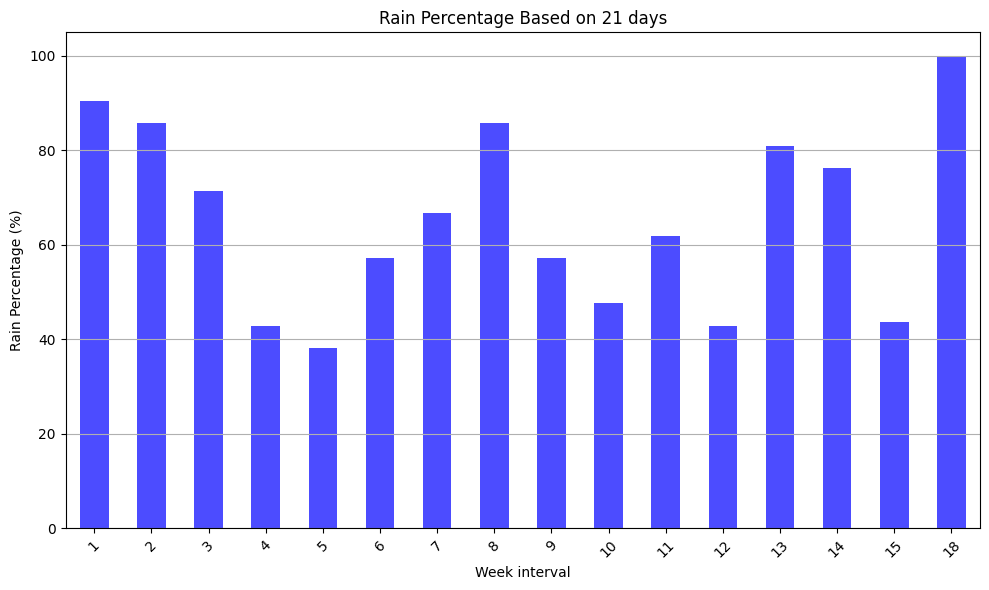

In [13]:
df['3week_interval'] = (df['week'] - 1) // 3 + 1
rain_percentage_3week = df.groupby('3week_interval')['rain_or_not'].mean() * 100
df['rain_%_3week']=df['3week_interval'].map(rain_percentage_3week)

plt.figure(figsize=(10, 6))
rain_percentage_3week.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Rain Percentage Based on 21 days')
plt.xlabel('Week interval')
plt.ylabel('Rain Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

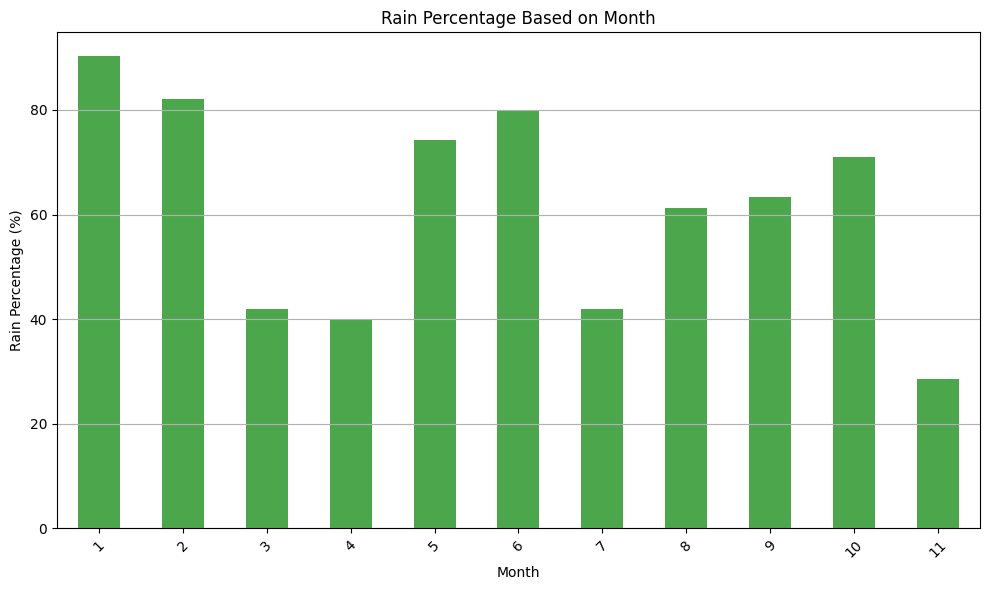

In [14]:
df['month'] = df['date'].dt.month
rain_percentage_month = df.groupby('month')['rain_or_not'].mean() * 100
df['rain_%_month']=df['month'].map(rain_percentage_month)

plt.figure(figsize=(10, 6))
rain_percentage_month.plot(kind='bar', color='green', alpha=0.7)

plt.title('Rain Percentage Based on Month')
plt.xlabel('Month')
plt.ylabel('Rain Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [15]:
print(df[df.isnull().any(axis=1)])

          date  avg_temperature  humidity  avg_wind_speed  rain_or_not  \
12  2023-01-13              NaN       NaN             NaN            0   
15  2023-01-16              NaN       NaN             NaN            1   
16  2023-01-17              NaN       NaN             NaN            0   
44  2023-02-14              NaN       NaN             NaN            1   
47  2023-02-17              NaN       NaN             NaN            1   
52  2023-02-22              NaN       NaN             NaN            0   
57  2023-02-27              NaN       NaN             NaN            1   
71  2023-03-13              NaN       NaN             NaN            0   
111 2023-04-22              NaN       NaN             NaN            1   
114 2023-04-25              NaN       NaN             NaN            1   
125 2023-05-06              NaN       NaN             NaN            1   
140 2023-05-21              NaN       NaN             NaN            1   
216 2023-08-05              NaN       

### Drop rows with invalid dates

In [16]:
df = df.dropna(subset=['date'])

### Drop rows with missing values in relevant columns

In [17]:
df = df.dropna(subset=['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover', 'pressure'])

### Drop rows where label is missing

In [18]:
df = df.dropna(subset=['rain_or_not'])

### Sorting by date

In [19]:
df = df.sort_values(by='date')

### Adding lag features (previous day’s values)

In [20]:
df['prev_temp'] = df['avg_temperature'].shift(1)
df['prev_humidity'] = df['humidity'].shift(1)
df['prev_pressure'] = df['pressure'].shift(1)
df = df.dropna()

### Correlations

In [21]:
print(df.corr()['rain_or_not'])

date              -0.097881
avg_temperature    0.303851
humidity           0.331958
avg_wind_speed     0.129030
rain_or_not        1.000000
cloud_cover       -0.032548
pressure           0.083140
day_of_week        0.008368
week              -0.098016
rain_%_week        0.508891
3week_interval    -0.091186
rain_%_3week       0.372856
month             -0.098690
rain_%_month       0.395581
prev_temp          0.253586
prev_humidity      0.327504
prev_pressure      0.031463
Name: rain_or_not, dtype: float64


### Correlation Heatmap

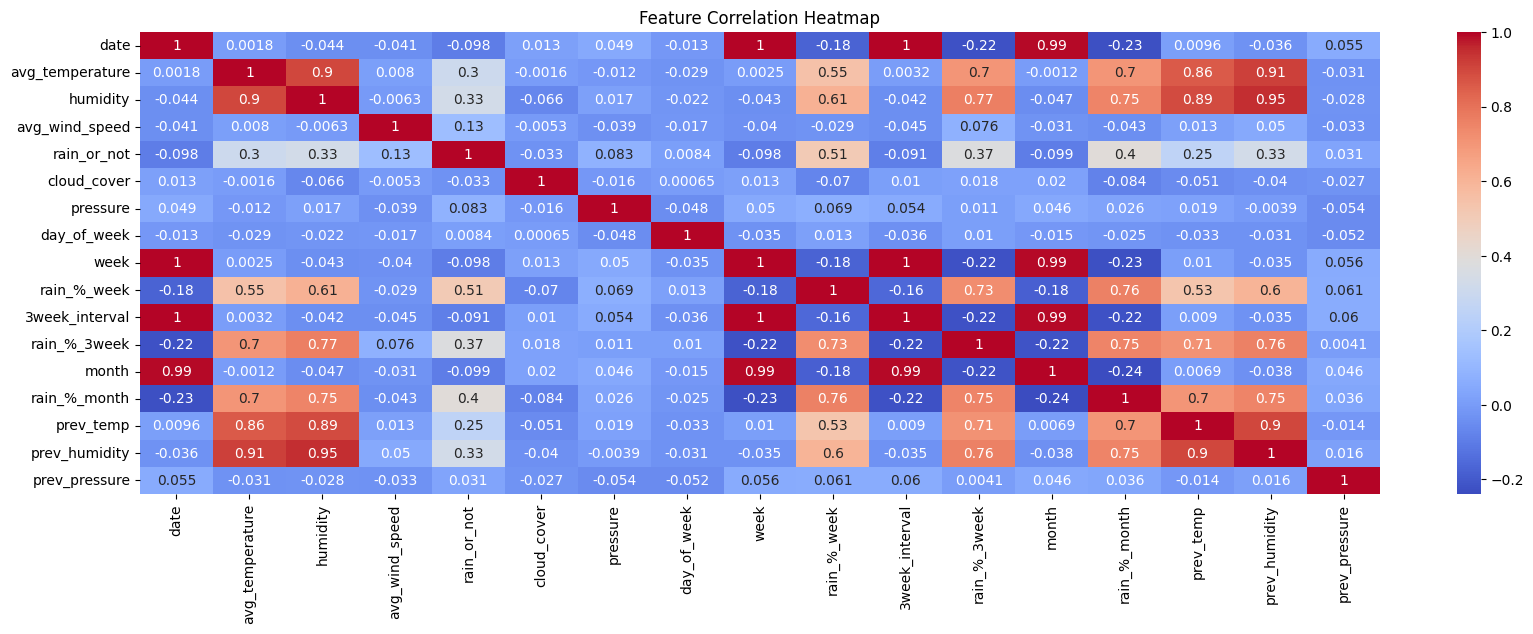

In [22]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Balancing unbalanced data

In [23]:
df_majority=df[df['rain_or_not']==1]
df_minority=df[df['rain_or_not']==0]

df_majority_resampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
df_bln=pd.concat([df_majority_resampled,df_minority])

In [24]:
df_bln.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day_of_week,week,rain_%_week,3week_interval,rain_%_3week,month,rain_%_month,prev_temp,prev_humidity,prev_pressure
298,2023-10-26,27.274189,44.284638,8.944048,1,57.187227,1010.065107,3,43,71.428571,15,43.750000,10,70.967742,23.722555,66.862274,1045.053105
270,2023-09-28,35.000000,76.379991,10.983373,1,26.982072,1033.137351,3,39,85.714286,13,80.952381,9,63.333333,32.922214,81.326773,956.364091
22,2023-01-23,32.056901,85.121702,11.910378,1,60.625294,978.218707,0,4,85.714286,2,85.714286,1,90.322581,30.305004,70.229232,955.705472
19,2023-01-20,31.298997,74.634525,9.415621,1,86.201448,1045.661462,4,3,85.714286,1,90.476190,1,90.322581,32.409620,67.795797,1015.695516
118,2023-04-29,27.880305,52.866204,11.249407,1,65.935392,1029.285442,5,17,57.142857,6,57.142857,4,40.000000,20.301356,54.606801,978.713796


In [25]:
df_balanced=df_bln.sample(frac=1,random_state=42).reset_index(drop=True)

In [26]:
df_balanced.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day_of_week,week,rain_%_week,3week_interval,rain_%_3week,month,rain_%_month,prev_temp,prev_humidity,prev_pressure
0,2023-09-02,22.233683,68.108998,0.771387,1,30.560422,1004.069848,5,35,42.857143,12,42.857143,9,63.333333,25.265932,54.676554,1020.368598
1,2023-09-12,28.386234,70.212373,6.522410,0,69.561815,954.814284,1,37,85.714286,13,80.952381,9,63.333333,29.462424,73.586035,1024.319320
2,2023-05-19,31.726466,75.747897,4.061170,1,34.970323,965.210428,4,20,57.142857,7,66.666667,5,74.193548,34.801649,71.903273,1015.429255
3,2023-09-04,27.372011,57.067987,8.952643,0,99.633434,974.189383,0,36,14.285714,12,42.857143,9,63.333333,31.871376,62.837235,959.653447
4,2023-03-08,18.319072,38.113550,13.837491,0,52.704146,961.476887,2,10,42.857143,4,42.857143,3,41.935484,22.838770,46.890099,1002.339091


In [27]:
df_balanced['rain_or_not'].value_counts()

rain_or_not
1    107
0    107
Name: count, dtype: int64

In [28]:
print(df.corr()['rain_or_not'])

date              -0.097881
avg_temperature    0.303851
humidity           0.331958
avg_wind_speed     0.129030
rain_or_not        1.000000
cloud_cover       -0.032548
pressure           0.083140
day_of_week        0.008368
week              -0.098016
rain_%_week        0.508891
3week_interval    -0.091186
rain_%_3week       0.372856
month             -0.098690
rain_%_month       0.395581
prev_temp          0.253586
prev_humidity      0.327504
prev_pressure      0.031463
Name: rain_or_not, dtype: float64


### Define features and target

In [29]:
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'month', 'day_of_week', 'week', '3week_interval', 'rain_%_week', 'rain_%_3week', 'rain_%_month', 'prev_temp', 'prev_humidity', 'prev_pressure']
X = df_balanced[features]
y = df_balanced['rain_or_not']

### Train-test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6744186046511628


### Hyperparameter tuning for Logistic Regression

In [33]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\w

Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l1'}


C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\weatherPrediction\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
future_dates = pd.date_range(start=df_balanced['date'].max() + pd.Timedelta(days=1), periods=21)
future_df = pd.DataFrame({'date': future_dates})
future_df['month'] = future_df['date'].dt.month
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['week'] = future_df['date'].dt.isocalendar().week
future_df['3week_interval'] = future_df['week'] // 3
future_df['rain_%_week']=0.5
future_df['rain_%_3week']=0.5
future_df['rain_%_month']=0.35

In [35]:
future_df[['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'prev_temp', 'prev_humidity', 'prev_pressure']] = df.iloc[-1][['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'prev_temp', 'prev_humidity', 'prev_pressure']].values

future_X = scaler.transform(future_df[features])


In [36]:
future_df['rain_probability'] = model.predict_proba(future_X)[:, 1]

print("Predicted rain probabilities for the next 21 days:")
print(future_df[['date', 'rain_probability']])

Predicted rain probabilities for the next 21 days:
         date  rain_probability
0  2023-11-08          0.046945
1  2023-11-09          0.045810
2  2023-11-10          0.044702
3  2023-11-11          0.043619
4  2023-11-12          0.042560
5  2023-11-13          0.049481
6  2023-11-14          0.048288
7  2023-11-15          0.047122
8  2023-11-16          0.045983
9  2023-11-17          0.044871
10 2023-11-18          0.043784
11 2023-11-19          0.042722
12 2023-11-20          0.049667
13 2023-11-21          0.048470
14 2023-11-22          0.047300
15 2023-11-23          0.046157
16 2023-11-24          0.045040
17 2023-11-25          0.043949
18 2023-11-26          0.042884
19 2023-11-27          0.044442
20 2023-11-28          0.043365
